In [ ]:
import pandas as pd
df=pd.read_csv('/content/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from  sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

VISUALIZATION


Axes(0.125,0.11;0.775x0.77)


YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

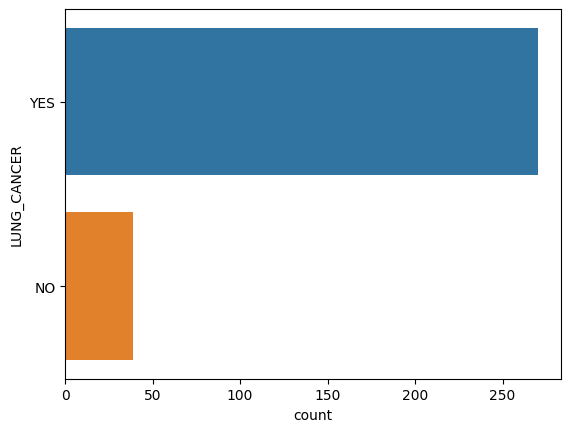

In [ ]:
print(sns.countplot(data=df,y='LUNG_CANCER'))
df['LUNG_CANCER'].value_counts()

<Axes: xlabel='GENDER', ylabel='count'>

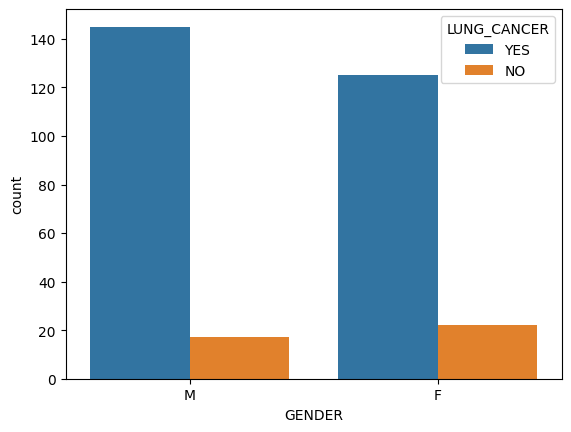

In [ ]:
sns.countplot(x='GENDER',data=df,hue='LUNG_CANCER')

In [ ]:
le=LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [ ]:
df.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

<Axes: >

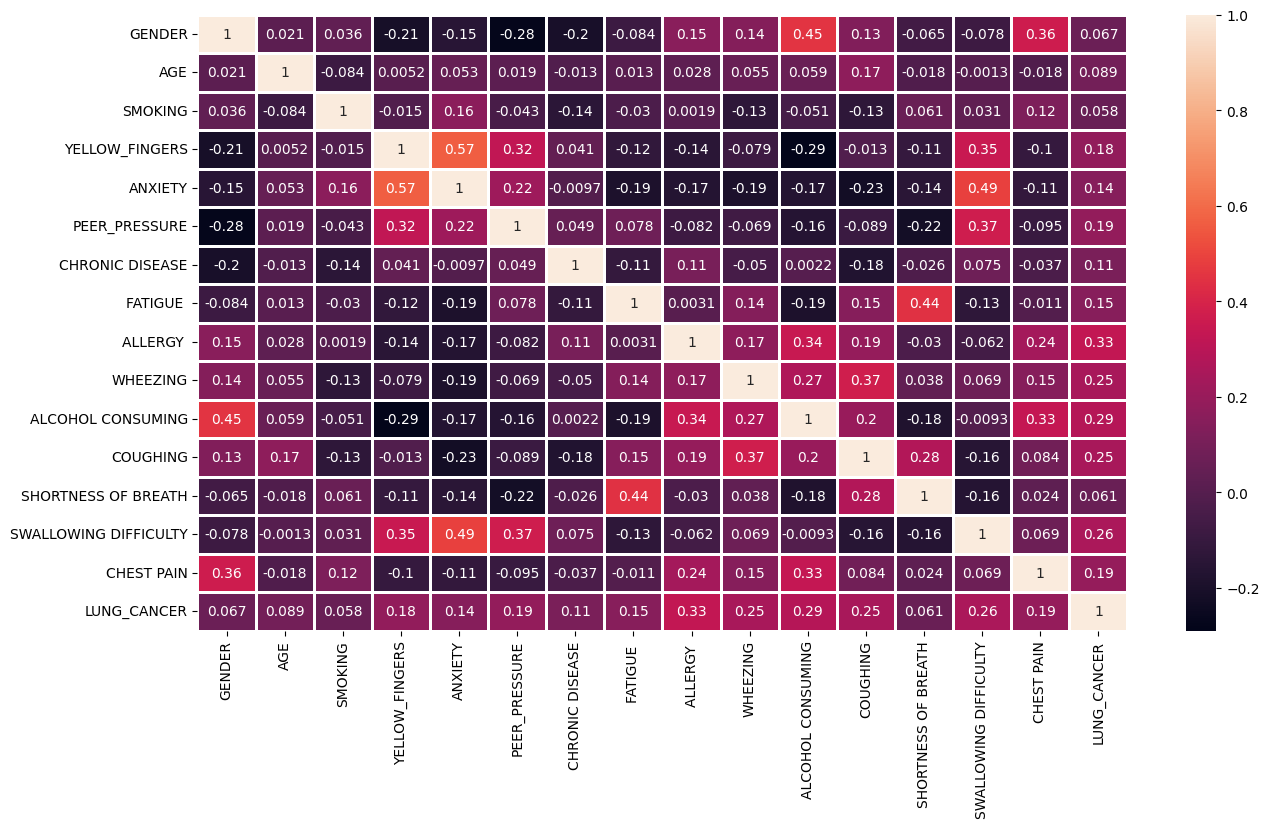

In [ ]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True,linewidths=1)


In [ ]:
X=df.iloc[:,:-1]
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [ ]:
y.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
mms=MinMaxScaler()
X=mms.fit_transform(X)
X

array([[1.        , 0.72727273, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.8030303 , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.57575758, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.56060606, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.6969697 , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.62121212, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

************************* KNeighborsClassifier() *************************
accuracy score 0.9032258064516129


              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.92      0.98      0.95        83

    accuracy                           0.90        93
   macro avg       0.76      0.64      0.67        93
weighted avg       0.89      0.90      0.89        93




************************* SVC() *************************
accuracy score 0.9032258064516129


              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.92      0.98      0.95        83

    accuracy                           0.90        93
   macro avg       0.76      0.64      0.67        93
weighted avg       0.89      0.90      0.89        93




************************* GaussianNB() *************************
accuracy score 0.9354838709677419


              precision    recall 

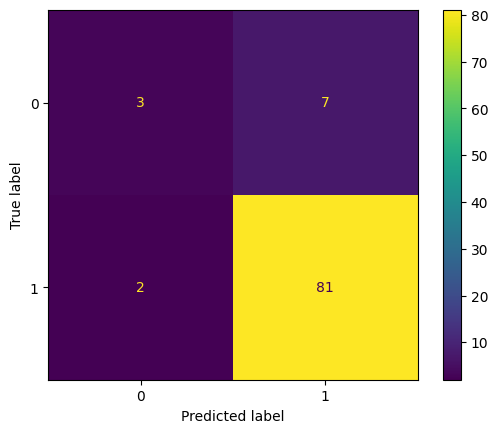

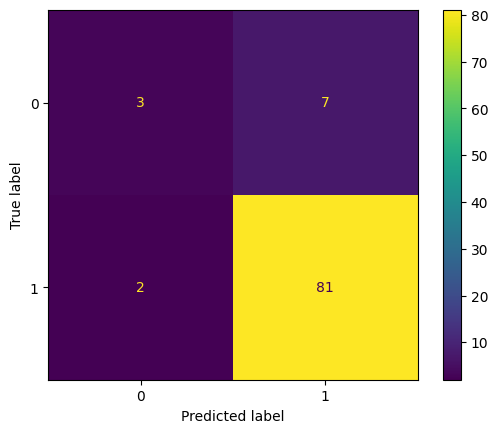

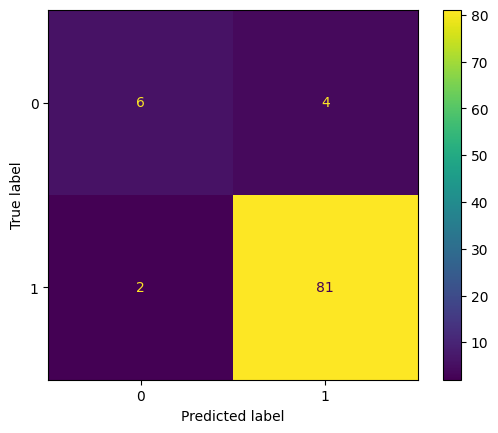

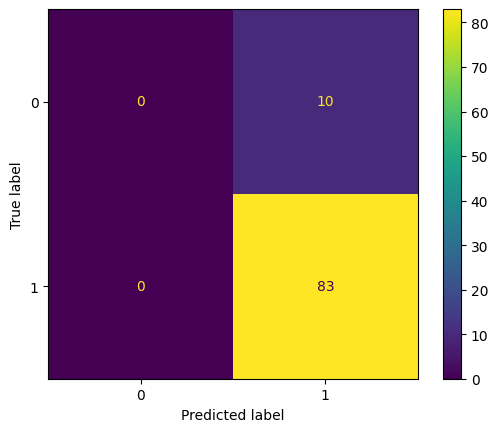

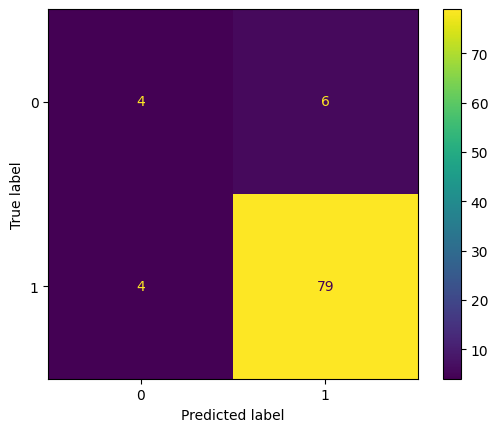

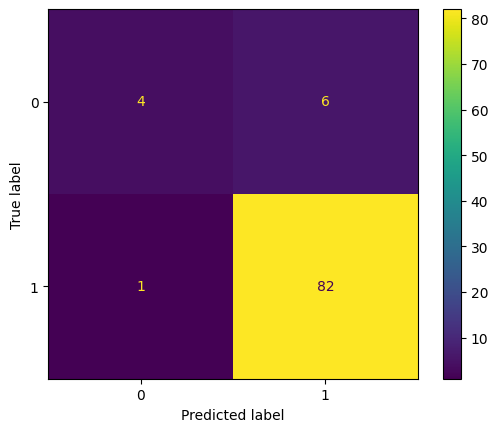

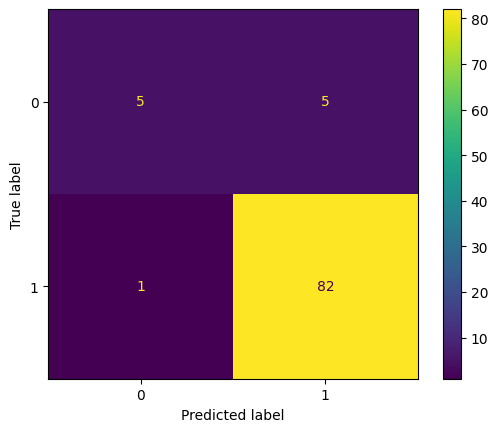

In [ ]:
kn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier()
models=[kn,sv,nb,mnb,dtc,rfc,ab]
for model in models:
  print('*'*25,model,'*'*25)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("accuracy score",accuracy_score(y_test,y_pred))
  print("")
  print("")
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("")
  print("")
  print("")

In [ ]:
y_train.value_counts()

1    187
0     29
Name: LUNG_CANCER, dtype: int64

In [ ]:
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_sm.value_counts()

1    187
0    187
Name: LUNG_CANCER, dtype: int64

************************* KNeighborsClassifier() *************************
accuracy score 0.9032258064516129
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.97      0.92      0.94        83

    accuracy                           0.90        93
   macro avg       0.75      0.86      0.79        93
weighted avg       0.93      0.90      0.91        93

************************* SVC() *************************
accuracy score 0.9139784946236559
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.95      0.95      0.95        83

    accuracy                           0.91        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.91      0.91      0.91        93

************************* GaussianNB() *************************
accuracy score 0.9247311827956989
              precision    recall  f1-score   

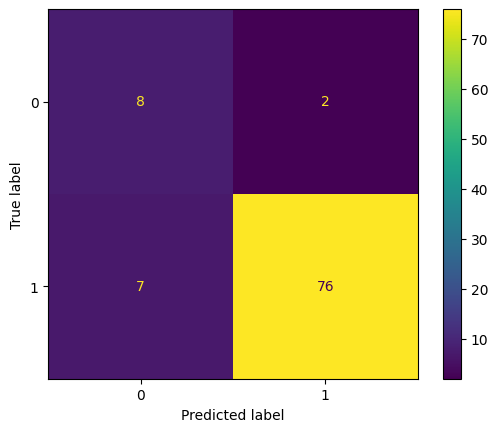

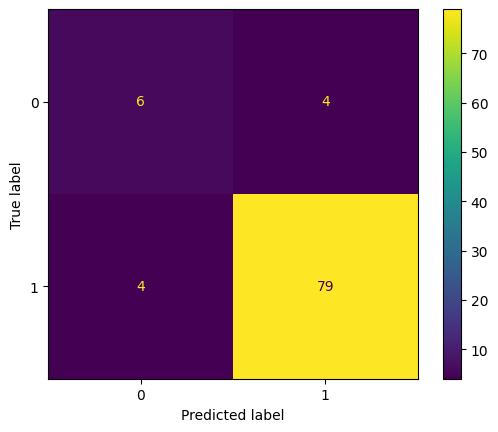

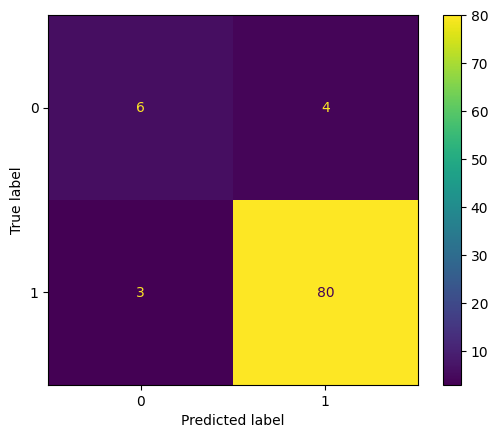

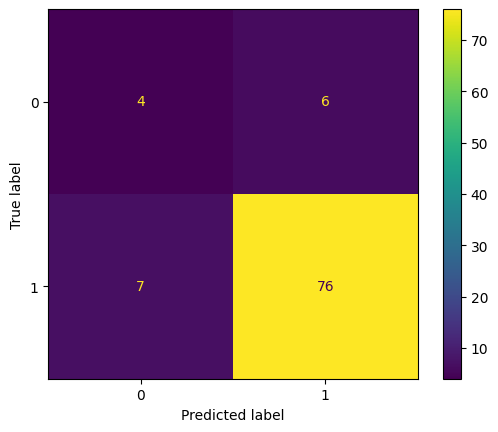

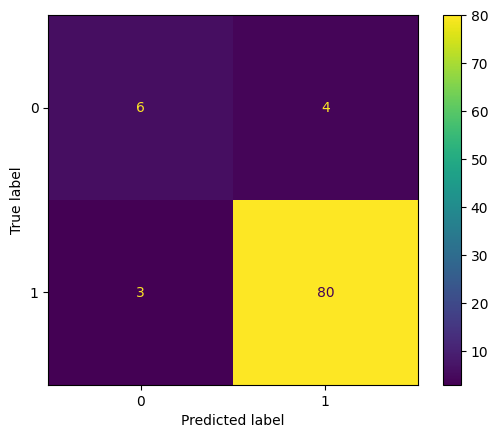

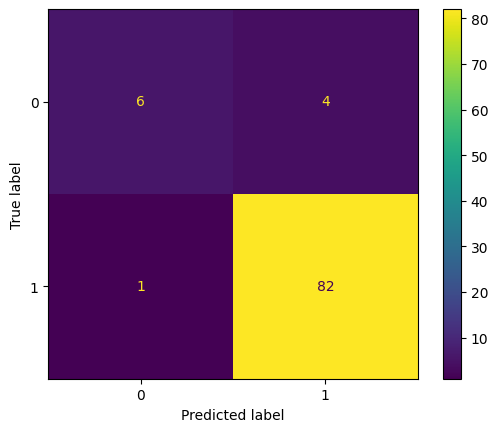

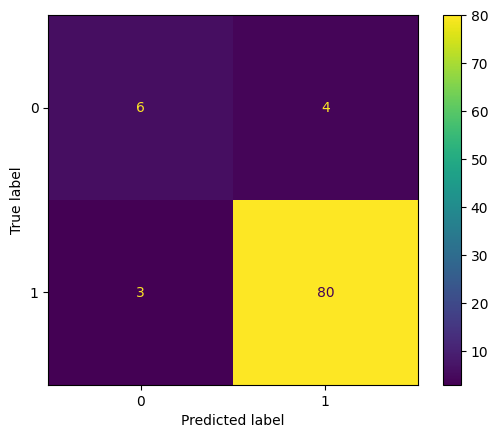

In [ ]:
kn_sm=KNeighborsClassifier()
sv_sm=SVC()
nb_sm=GaussianNB()
mnb_sm=MultinomialNB()
dtc_sm=DecisionTreeClassifier()
rfc_sm=RandomForestClassifier(random_state=1)
ab_sm=AdaBoostClassifier()
models1=[kn_sm,sv_sm,nb_sm,mnb_sm,dtc_sm,rfc_sm,ab_sm]
for model in models1:
  print('*'*25,model,'*'*25)
  model.fit(X_train_sm,y_train_sm)
  y_pred=model.predict(X_test)
  print("accuracy score",accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
y_train_us.value_counts()

0    29
1    29
Name: LUNG_CANCER, dtype: int64

************************* KNeighborsClassifier() *************************
accuracy score 0.8064516129032258
              precision    recall  f1-score   support

           0       0.30      0.60      0.40        10
           1       0.95      0.83      0.88        83

    accuracy                           0.81        93
   macro avg       0.62      0.72      0.64        93
weighted avg       0.88      0.81      0.83        93

************************* SVC() *************************
accuracy score 0.8924731182795699
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       1.00      0.88      0.94        83

    accuracy                           0.89        93
   macro avg       0.75      0.94      0.80        93
weighted avg       0.95      0.89      0.91        93

************************* GaussianNB() *************************
accuracy score 0.9032258064516129
              precision    recall  f1-score   

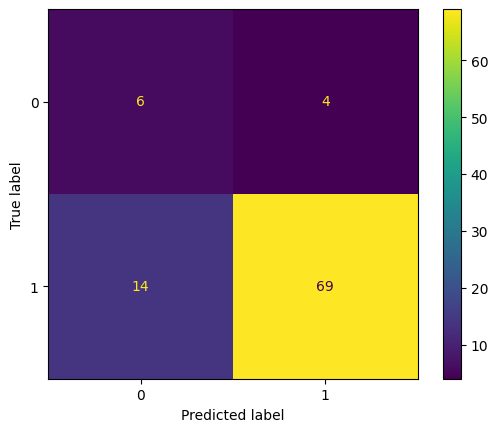

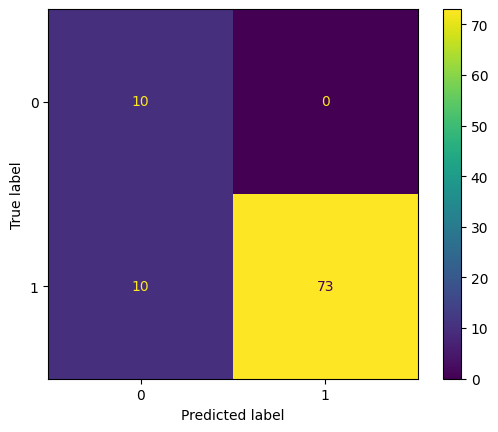

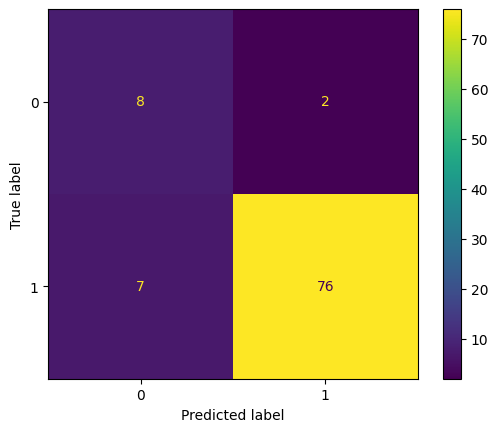

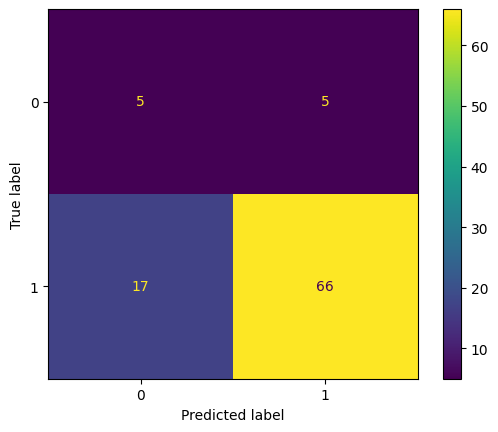

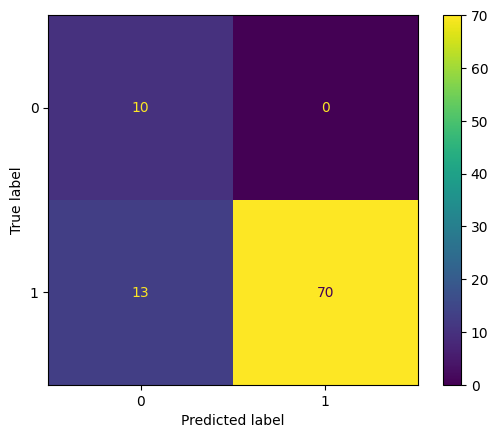

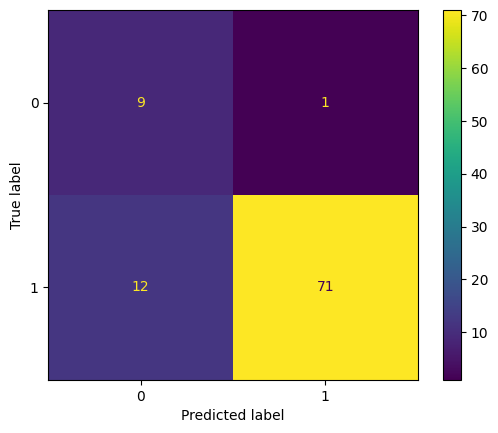

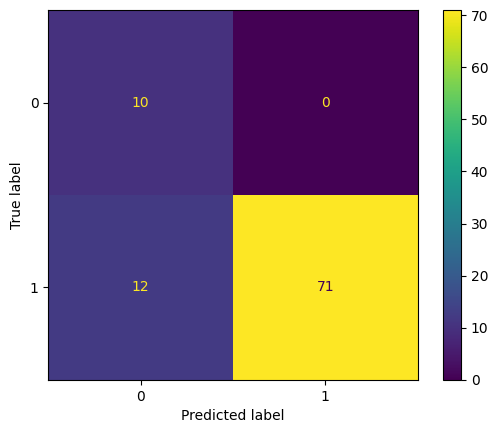

In [ ]:
kn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
mnb_us=MultinomialNB()
dtc_us=DecisionTreeClassifier()
rfc_us=RandomForestClassifier(random_state=1)
ab_us=AdaBoostClassifier()
models2=[kn_us,sv_us,nb_us,mnb_us,dtc_us,rfc_us,ab_us]
for model in models2:
  print('*'*25,model,'*'*25)
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test)
  print("accuracy score",accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


accuracy score 0.9354838709677419
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.94      0.99      0.96        83

    accuracy                           0.94        93
   macro avg       0.89      0.74      0.79        93
weighted avg       0.93      0.94      0.93        93



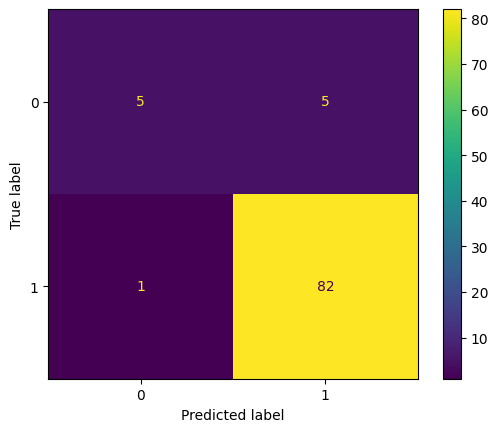

In [ ]:
models4=[("kn_sc",KNeighborsClassifier()),("nb_sc",GaussianNB()),("ab_sc",AdaBoostClassifier()),("dtc_sc",DecisionTreeClassifier()),("rfc_sc",RandomForestClassifier()),("sv_sc",SVC(),("ad_sc",AdaBoostClassifier()))]
sc=StackingClassifier(estimators=models4,final_estimator=RandomForestClassifier())
sc.fit(X_train,y_train)
y_pred_sc=sc.predict(X_test)
print("accuracy score",accuracy_score(y_test,y_pred_sc))
print(classification_report(y_test,y_pred_sc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sc))

In [ ]:
pca=PCA(n_oversamples=6)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

************************* KNeighborsClassifier() *************************
accuracy score 0.9032258064516129
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.92      0.98      0.95        83

    accuracy                           0.90        93
   macro avg       0.76      0.64      0.67        93
weighted avg       0.89      0.90      0.89        93

************************* SVC() *************************
accuracy score 0.9032258064516129
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.92      0.98      0.95        83

    accuracy                           0.90        93
   macro avg       0.76      0.64      0.67        93
weighted avg       0.89      0.90      0.89        93

************************* GaussianNB() *************************
accuracy score 0.9247311827956989
              precision    recall  f1-score   

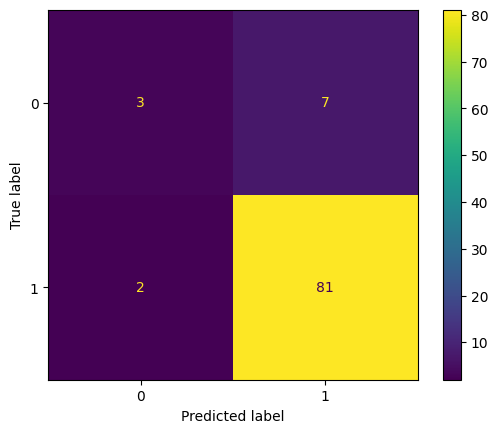

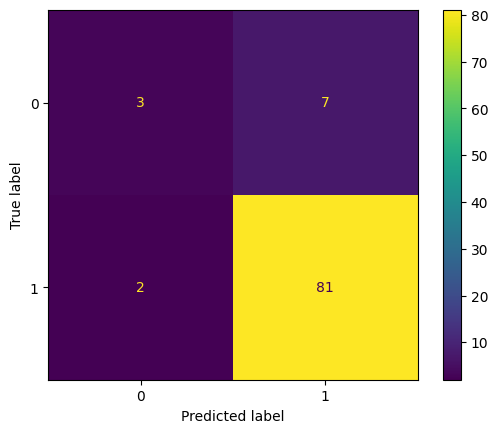

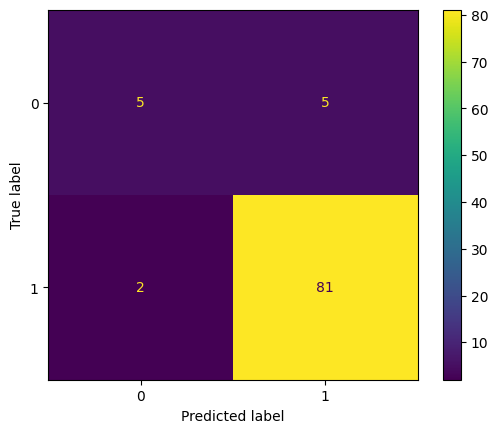

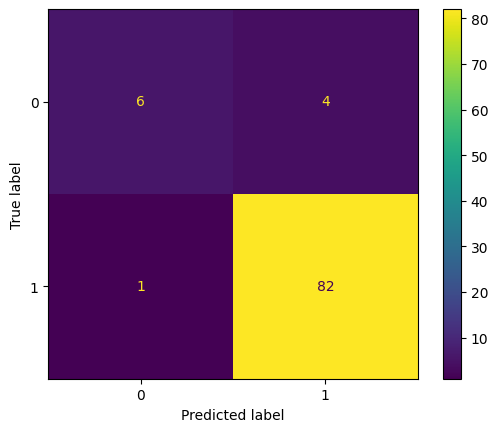

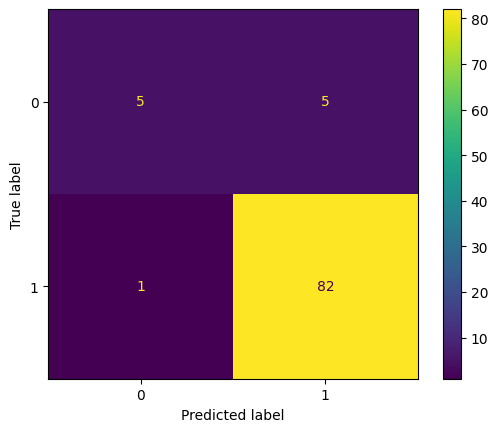

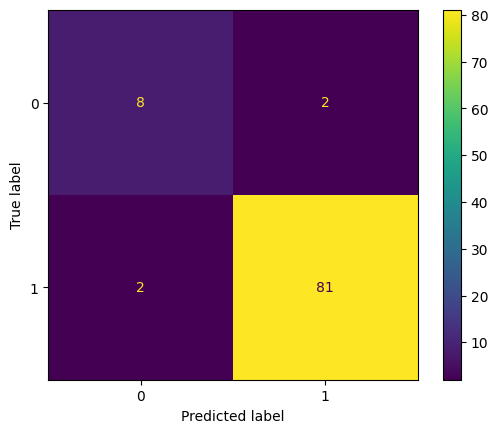

In [ ]:
kn_pca=KNeighborsClassifier()
sv_pca=SVC()
nb_pca=GaussianNB()
dtc_pca=DecisionTreeClassifier()
rfc_pca=RandomForestClassifier(random_state=1)
ab_pca=AdaBoostClassifier()
models3=[kn_pca,sv_pca,nb_pca,dtc_pca,rfc_pca,ab_pca]
for model in models3:
  print('*'*25,model,'*'*25)
  model.fit(X_train_pca,y_train)
  y_pred=model.predict(X_test_pca)
  print("accuracy score",accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))